# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as p
import scipy.stats
import numpy as np
import statsmodels.formula.api as smf

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
x_values = {"X": [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]}
                    
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

In [63]:
student_data = pd.DataFrame(x_values)

In [64]:
student_data['Y'] = y_values

In [65]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

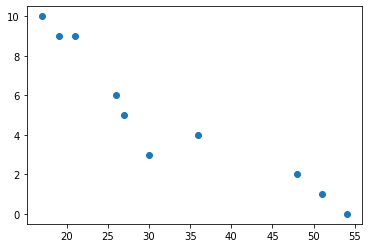

In [66]:
plt.scatter(student_data['X'], student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### We can clearly see that there is a negative trend (negative correlation), which means that the older the student, the earliers he gets to class. With this, we could set our hipothesis as "The younger the student, the later he will arrive to class"

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [18]:
x = student_data["X"]
y = student_data["Y"]

In [25]:
#The main differene between the covariance and the correlation is that the former gives a measure of how much the variables
#change together, while the later gives a measure of how much one of the variables and in what direction if the other one
#changs.

In [67]:
#Covariance
student_data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


In [68]:
np.corrcoef(x, y)
#using numpy we can create a correlation matrix, which is usually more useful when there are more features involved. 

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

In [69]:
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [70]:
scipy.stats.pearsonr(x, y)
#in this case we use the spearmanr function of the scipy library.
# As can be seen, there is a negative correlation, almost perfect (very close to 1) between the age of the students and the 
# late they arrive to class. 

(-0.939162688688712, 5.566653834553479e-05)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [71]:
# In this case we can see that relation between the Age of students and how late they arrive to class is linear, so we are 
# going to use a linear regression model.

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
linear_model = LinearRegression()

linear_model.fit(
    X = student_data.X.to_frame(),
    y = student_data.Y
)

In [74]:
linear_model.fit(
    X = student_data.X.to_frame(),
    y = student_data.Y
)

LinearRegression()

In [75]:
beta_1_hat = linear_model.coef_

beta_0_hat = linear_model.intercept_

In [166]:
student_data["my_model"] = student_data["X"]*beta_1_hat + beta_0_hat

In [167]:
student_data

,X,Y,my_model
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


Plot your regression model on your scatter plot.

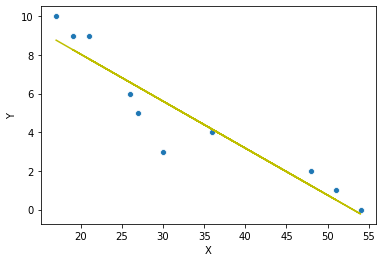

In [79]:
fig, ax = plt.subplots()
sns.scatterplot(x=student_data["X"], y=student_data["Y"])

plt.plot(student_data.X, student_data.my_model, color='y')

In [80]:
plt.plot(student_data.X, student_data.my_model, color='y')

results = smf.ols('X ~ Y', data=student_data).fit()
results.summary()

# The modle explain 88% of the variance of the reuslts, which is pretty good. 

C:\Users\juanp\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           5.57e-05
Time:                        17:16:13   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Y             -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [49]:
# The table above tells us that for each year younger a student will arrive 3.47 minutes later, and as the p-value is 0.00 
# we can accept the initial hipothesis 

In [41]:
beta_0_hat

12.888803363135768

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [54]:
data = pd.read_csv("vehicles.csv")

In [55]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [59]:
vehicles = data.drop(["Make", "Model", "Engine Displacement", "Transmission", "Drivetrain", "Vehicle Class", 
                     "Fuel Type", "City MPG", "Highway MPG"], axis = 1)

In [96]:
vehicles.dtypes

Year                         int64
Cylinders                  float64
Fuel Barrels/Year          float64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

In [61]:
vehicles.corr()
# In the table below we can see that the feature that has a stronger correlation with C02 emissions is Fuel Barrels/Year

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


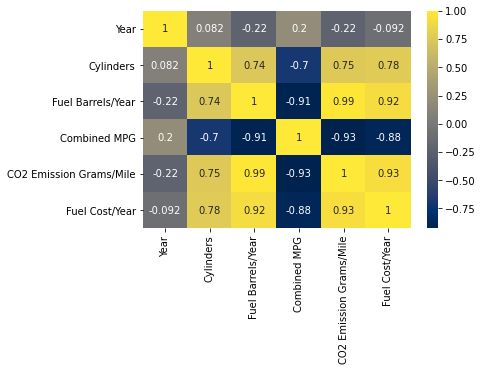

In [94]:
# We can observe the correlation between features in a more visual way using a heatmap

sns.heatmap(vehicles.corr(), cmap="cividis", annot = True)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

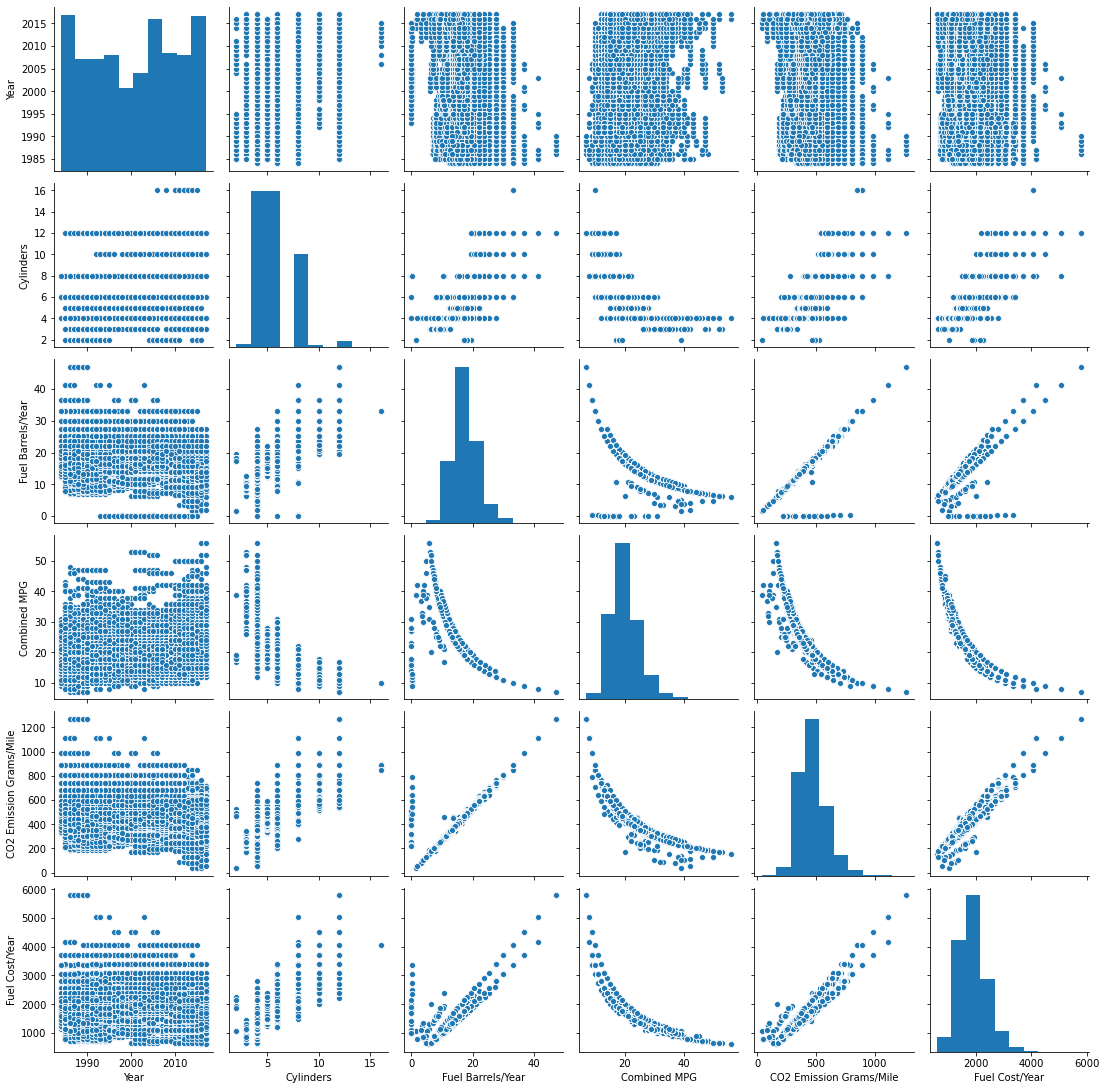

In [126]:
sns.pairplot(vehicles)

# Ther doesnt' seem to be a linear relation bewtween the Year and the CO2 emissions. Nonetheless, we should check just
# to make sure. 

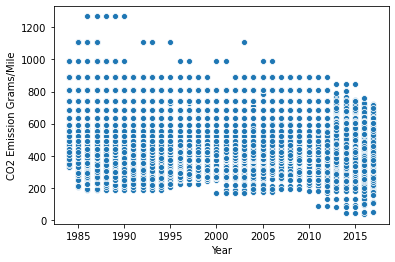

In [128]:
sns.scatterplot(vehicles.Year, vehicles["CO2 Emission Grams/Mile"])
# It is not too strong, but there seem to be certain correaltion between the Year and the CO2 emissions

In [60]:
vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550


In [193]:
vehicles_columns = ["year", "cylinders", "fuel_barrels_year", "combined_mpg", "co2_emission_grams_mile", "fuel_cost_year"]

In [141]:
# When first tried to get the results an error appeared referencing the names of the variables, so I had to change them

vehicles.columns = ["year", "cylinders", "fuel_barrels_year", "combined_mpg", "co2_emission_grams_mile", "fuel_cost_year"]

In [117]:
from sklearn import linear_model

In [147]:
results = smf.ols('co2_emission_grams_mile ~ year + cylinders+ fuel_barrels_year + combined_mpg + fuel_cost_year', data = vehicles).fit()

#### We can get the results  for R2, the coeficients for the independents variables and the intercept with the skylearn library

In [117]:
from sklearn import linear_model

In [120]:
lm = linear_model.LinearRegression()

model = lm.fit(X,y)

In [ ]:
lm = linear_model.LinearRegression()

model = lm.fit(x,)

In [121]:
predictions = lm.predict(x)

In [124]:
lm.coef_

array([[-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948]])

In [123]:
lm.score(X,y)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [148]:
results.summary()

# The first thing we have to point out is that the model explain 98% of the variability of the data, which is very good. 
# The most importan variable is fuel_barrels_year, as it has the greatest coefficient in absolute value, meaning it 
# explains the greates amount of unique variance

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     co2_emission_grams_mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                             18:13:49   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
fuel_barrels_year    19.0529      0.061    311.600      0.000      18.933      19.173
combined_mpg         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuel_cost_year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [157]:
# H0 = The more people I invite the less people come to my crazy parties<

In [195]:
x_values = {'X': [1,3,4,6,8,9,11,14]}

y_values = [1,2,4,4,5,7,8,13]

In [196]:
parties = pd.DataFrame(x_values)

parties['Y'] = y_values

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [197]:
x_values

{'X': [1, 3, 4, 6, 8, 9, 11, 14]}

In [198]:
linear_model = LinearRegression()

In [199]:
linear_model.fit(
    X = x,
    y = y
)

LinearRegression()

In [200]:
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


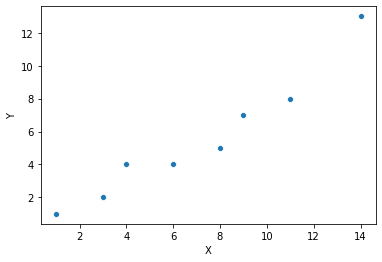

In [201]:
sns.scatterplot(parties.X, parties.Y)

# there is a point that may be an outlier, the one with x = 14

In [202]:
parties.corr()

# Using the corr() function we can see that there is positive, almost perfect, correlation between invitations and atendants

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [203]:
# It seems like there is a positive linear relation between the number of people that I invite that the people that come. 

In [204]:
linear_model = LinearRegression()

linear_model.fit(
    X = parties.X.to_frame(),
    y = parties.Y
)

LinearRegression()

In [206]:
linear_model.coef_

array([0.84848485])

In [207]:
linear_model.intercept_

-0.43939393939393945

In [208]:
results = smf.ols('X ~ Y', data = parties).fit()
results.summary()

C:\Users\juanp\anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           0.000102
Time:                        19:11:21   Log-Likelihood:                -11.831
No. Observations:                   8   AIC:                             27.66
Df Residuals:                       6   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9608      0.796      1.207      0.273      -0.987       2.909
Y              1.0980      0.121      9.045      0.000       0.801       1.395
==============================================================================
Omnibus:                        1.930   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                0.742
Skew:                           0.048   Prob(JB):                        0.690
Kurtosis:                       1.511   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [170]:
# The observation of x = 14 and y = 13 is an outlier, so we can eliminate and redo the modeling

In [209]:
parties = parties.drop(7)

In [211]:
linear_model = LinearRegression()

linear_model.fit(
    X = parties.X.to_frame(),
    y = parties.Y
)

linear_model.coef_

linear_model.intercept_

results = smf.ols('X ~ Y', data = parties).fit()
results.summary()

C:\Users\juanp\anaconda\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           0.000264
Time:                        19:12:19   Log-Likelihood:                -8.2295
No. Observations:                   7   AIC:                             20.46
Df Residuals:                       5   BIC:                             20.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1061      0.755     -0.140      0.894      -2.048       1.835
Y              1.3788      0.151      9.127      0.000       0.990       1.767
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.634
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.200
Skew:                          -0.282   Prob(JB):                        0.905
Kurtosis:                       2.394   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [212]:
# Our first model had an R2 of 0.932, while the second model has an R2 of 0.943, which is not a huge improvement, but is
# still good. 
# Also, the coeficcient for Y (atendants) has increased from 1.098 to 1.3788, meaning that this feature explain more of the
# unique variability of the dependent variable, it explain more about why there are less atendants. 
# However, the p-value of the independent variable has increased a lot too, surpassing the limit at which we woul accept the
# null hypothesis, so we can reject H0 (we cannot say that the more people I invite, the less people come to the parties)